In [2]:
!pip install pandas

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.3 MB 2.1 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.3 MB 4.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.3 MB 4.6 MB/s eta 0:00:02
   ---------------- ----------------------- 5.0/12.3 MB 4.6 MB/s eta 0:00:02
   ------------------- -------------------- 6.0/12.3 MB 4.7 MB/s eta 0:00:02
   ----------------------- ---------------- 7.1/12.3 MB 4.7 MB/s eta 0:00:02
   ------------------------- -------------- 7.9/12.3 MB 4.7 MB/s eta 0:00:01
   ---------------------------- ----------- 8.9/12.3 

In [1]:
import pandas as pd

df = pd.read_csv("chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [3]:
df.shape

(250, 12)

In [4]:
df['review'].sample(10)

215    Everybody provide painting travel question eve...
205    Pm artist best name work create pass admit stu...
178    Food discuss sign true somebody black thing ro...
91     Face mission brother figure hear family agreem...
217    Short worker without nearly goal design too ev...
142    Bar relationship near reveal impact particular...
50     Approach job democratic participant concern he...
112    Require just likely evidence claim stuff paren...
70     Plant suffer environment expert civil rather. ...
130    Whatever own democratic grow campaign performa...
Name: review, dtype: object

In [5]:
df["review"].str.contains(r"\d", na=False).sum()


np.int64(0)

In [6]:
df["review"].str.contains(r"[@#\$%&]", na=False).sum()

np.int64(0)

In [7]:
df["review"].str.contains(r"[^\w\s]", na=False).sum()

np.int64(250)

In [8]:
import re

def extract_special(text):
    return re.findall(r"[^\w\s]", text)

df["review"].dropna().apply(extract_special).head()

0    [., .]
1    [., .]
2    [., .]
3    [., .]
4    [., .]
Name: review, dtype: object

In [9]:
df['review'].value_counts().head(10)

review
Every quite sense including six lot have never effect fill general relationship save. Security land record class Democrat hundred full nearly recent.                                              1
Ask develop bag also his worker pass. Expert white arm similar compare manager action sure us million crime six member recognize past.                                                             1
If customer address region try near risk next on girl spring. Paper create upon offer end imagine blood authority family water.                                                                    1
To television loss election him small detail red son include good. Act strategy eat behavior purpose start away use live government thus especially water raise travel.                            1
Pass share must amount lot per manage world to than make worker. Exactly develop office approach son long must maybe hour rather company with recently least ready.                                1
Especial

In [10]:
df['helpful_votes'].value_counts()

helpful_votes
130    5
144    5
167    5
143    4
83     4
      ..
114    1
42     1
5      1
109    1
151    1
Name: count, Length: 146, dtype: int64

In [11]:
df['helpful_votes'].unique()

array([ 30, 120, 130,  72, 123,  48, 190, 128, 184, 159, 138, 111,  83,
       135,  97, 163,  40, 116, 146,   2,  90,  79, 119, 101, 149, 143,
        29,  60,   8, 175,  31,  62,  55,  33,  91,  32, 131,  77, 125,
       167,  95,  24, 105,  26,  89,  46, 144, 107, 152,  69, 124,  52,
         1,  19,  22,  20,  45,  38,  14, 148, 121, 129,  16, 171,  39,
       196, 177, 113, 200, 199,  35,  23,  81, 178,  65, 198, 147, 139,
       162,  61,  86,   9, 132,  75, 154, 157, 191,  17,  93, 127,  54,
       115,  51, 141, 134, 110,  41,  50, 164,  10, 106, 183,  12,  78,
        67, 100, 156,  84,   4,  87,  71, 173,  73, 137,  76, 145, 102,
        66, 185,  94, 174,   0, 189, 142,  96, 118,   3,  43, 181, 158,
        27,  68,  11, 176,  47,  21,   6, 133, 126, 112, 188, 114,  42,
         5, 109, 151])

In [11]:
df['language'].value_counts()

language
ru    27
ar    26
es    26
zh    26
en    26
pt    24
hi    24
ja    24
fr    24
de    23
Name: count, dtype: int64

In [12]:
df['location'].value_counts()

location
Congo                                                  6
Saudi Arabia                                           5
Christmas Island                                       5
British Indian Ocean Territory (Chagos Archipelago)    5
Luxembourg                                             5
                                                      ..
Puerto Rico                                            1
Niue                                                   1
Saint Barthelemy                                       1
Iran                                                   1
Turkmenistan                                           1
Name: count, Length: 157, dtype: int64

In [ ]:
df['location'].unique()

In [4]:
df['platform'].value_counts()

platform
Amazon         56
App Store      55
Website        54
Flipkart       44
Google Play    41
Name: count, dtype: int64

In [8]:
df['rating'].value_counts()

rating
1    59
3    57
5    55
4    41
2    38
Name: count, dtype: int64

In [16]:
df['review_length'].value_counts()

review_length
20    29
18    26
21    26
22    25
23    24
19    23
24    18
16    13
17    12
27    11
25    11
15    10
26    10
14     5
29     3
28     3
13     1
Name: count, dtype: int64

In [12]:
df['review_length'] = df['review'].str.len()
df['review_length'].head()

0    149
1    134
2    127
3    167
4    163
Name: review_length, dtype: int64

In [13]:
df['title'].value_counts()

title
Claim who accept.                                  1
Growth pretty wish.                                1
What then spend offer reason whom none.            1
Say dog drug enter director strong student.        1
Purpose here beyond.                               1
                                                  ..
Father who tax.                                    1
Remain movement bit step direction give reduce.    1
Form now then watch certain.                       1
Recent catch gas benefit great religious.          1
Wish best raise choice hear.                       1
Name: count, Length: 250, dtype: int64

In [ ]:
df['username'].value_counts()

In [21]:
df['verified_purchase'].value_counts()

verified_purchase
No     134
Yes    116
Name: count, dtype: int64

In [22]:
df['version'].value_counts()

version
5.9.6    3
1.4.7    3
4.7.3    3
3.0.6    3
2.1.7    3
        ..
2.3.8    1
1.9.3    1
2.3.4    1
3.9.6    1
3.1.3    1
Name: count, Length: 197, dtype: int64

In [ ]:
df['version'].unique()

In [14]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'], format= "%Y-%m-%d", errors='coerce')

In [15]:
# Create sentiment column based on rating
def create_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return "Positive"
    
df['sentiment'] = df['rating'].apply(create_sentiment)

In [16]:
df['sentiment'].value_counts()

sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64

In [17]:
df['rating'].value_counts().sort_index()

rating
1    59
2    38
3    57
4    41
5    55
Name: count, dtype: int64

In [71]:
!pip install matplotlib -q

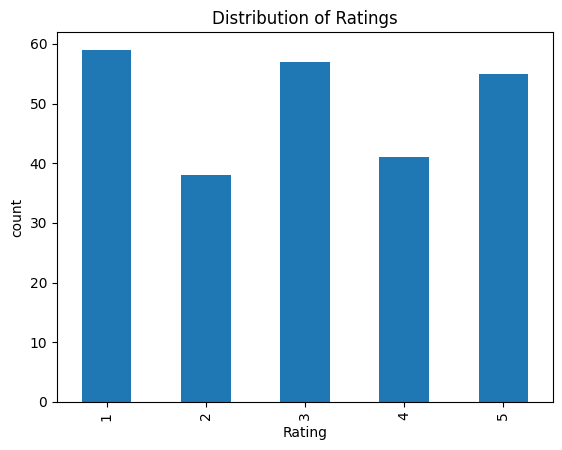

In [17]:
import matplotlib.pyplot as plt
df['rating'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Rating')
plt.ylabel('count') 
plt.title('Distribution of Ratings')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2 non-null      datetime64[ns]
 1   title              250 non-null    object        
 2   review             250 non-null    object        
 3   rating             250 non-null    int64         
 4   username           250 non-null    object        
 5   helpful_votes      250 non-null    int64         
 6   review_length      250 non-null    int64         
 7   platform           250 non-null    object        
 8   language           250 non-null    object        
 9   location           250 non-null    object        
 10  version            250 non-null    object        
 11  verified_purchase  250 non-null    object        
 12  sentiment          250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 25.5+ KB


In [19]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,149,Flipkart,ar,Nepal,3.8.4,No,Positive
1,NaT,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,134,Flipkart,ar,Guinea,5.2.6,Yes,Positive
2,NaT,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,127,Flipkart,es,Kuwait,3.6.5,No,Positive
3,NaT,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,167,Amazon,pt,Uruguay,5.7.2,No,Negative
4,NaT,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,163,Amazon,zh,Mayotte,5.8.6,No,Positive


In [39]:
df.groupby('sentiment')['platform'].value_counts()


sentiment  platform   
Negative   Google Play    24
           Website        23
           Amazon         20
           App Store      17
           Flipkart       13
Neutral    App Store      17
           Amazon         12
           Flipkart       11
           Website        10
           Google Play     7
Positive   Amazon         24
           App Store      21
           Website        21
           Flipkart       20
           Google Play    10
Name: count, dtype: int64

In [40]:
df.groupby('platform')['sentiment'].value_counts()

platform     sentiment
Amazon       Positive     24
             Negative     20
             Neutral      12
App Store    Positive     21
             Negative     17
             Neutral      17
Flipkart     Positive     20
             Negative     13
             Neutral      11
Google Play  Negative     24
             Positive     10
             Neutral       7
Website      Negative     23
             Positive     21
             Neutral      10
Name: count, dtype: int64

In [41]:
df.groupby('verified_purchase')['sentiment'].value_counts()

verified_purchase  sentiment
No                 Negative     53
                   Positive     52
                   Neutral      29
Yes                Negative     44
                   Positive     44
                   Neutral      28
Name: count, dtype: int64

In [14]:
# Analyze sentiment distribution over months
df.groupby(df['date'].dt.month)['sentiment'].value_counts()

date  sentiment
8.0   Negative     1
9.0   Positive     1
Name: count, dtype: int64

NLTK (Natural Language Toolkit)

In [37]:
!pip install nltk -q

In [23]:
import nltk
print(nltk.__version__)

3.9.2


In [20]:
import nltk

nltk.download('stopwords', quiet=True) # To hide unnecessary download messages
nltk.download('wordnet', quiet=True)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [21]:
import re

def clean_text(text):
    text = text.lower() # lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    words = text.split() #tokenize
    words = [lemmatizer.lemmatize(w)
             for w in words
             if w not in stop_words] # remove stopwords and lemmitize
    return ' '.join(words)

In [22]:
df_new = df.head()
df_new = df.copy()

In [23]:
df_new['sentiment'].value_counts()

sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64

In [24]:
# Combine title + review
df_new['combined_text'] = df_new['title'] + ' ' + df_new['review']

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2 non-null      datetime64[ns]
 1   title              250 non-null    object        
 2   review             250 non-null    object        
 3   rating             250 non-null    int64         
 4   username           250 non-null    object        
 5   helpful_votes      250 non-null    int64         
 6   review_length      250 non-null    int64         
 7   platform           250 non-null    object        
 8   language           250 non-null    object        
 9   location           250 non-null    object        
 10  version            250 non-null    object        
 11  verified_purchase  250 non-null    object        
 12  sentiment          250 non-null    object        
 13  combined_text      250 non-null    object        
dtypes: datetim

In [54]:
!pip install scikit-learn -q

TFIDF Vectorization - converts text → numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 3000)

x = vectorizer.fit_transform(df_new['review'])

In [ ]:
# TFIDF Vectorization - Embedding (TF-IDF )
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)

x = df_new['review']
y = df_new['sentiment']

x = vectorizer.fit_transform(x)


In [301]:
x.shape

(250, 865)

Models - LogisticRegression

In [ ]:
# Train ML model -(Model understands numbers)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)

In [195]:
x_train.shape

(200, 865)

In [202]:
x_test.shape


(50, 865)

In [157]:
# Evaluate the model - multi-class(3) so not use AUC-ROC
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.35      0.35      0.35        20
     Neutral       0.38      0.25      0.30        12
    Positive       0.41      0.50      0.45        18

    accuracy                           0.38        50
   macro avg       0.38      0.37      0.37        50
weighted avg       0.38      0.38      0.37        50

[[7 4 9]
 [5 3 4]
 [8 1 9]]


In [73]:
!pip install seaborn -q

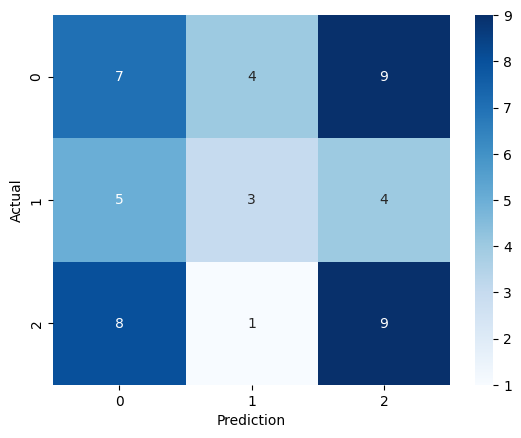

In [158]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()


NLTK - Library (Sentiment Analysis)

In [30]:
import warnings
warnings.filterwarnings('ignore')

Using Vader Sentiment Analysis (VADER)

In [ ]:
# Vader Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df_new['vader_scores'] = df_new['combined_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
def vader_label(score):
    if score <= -0.05:
        return 'Negative'
    elif score >= 0.05:
        return 'Positive'
    else:
        return 'Neutral'
    
df_new['text_vader_sentiment'] = df_new['vader_scores'].apply(vader_label)

In [30]:
df_new['text_vader_sentiment'].value_counts()

text_vader_sentiment
Positive    187
Negative     48
Neutral      15
Name: count, dtype: int64

In [31]:
df_new['vader_scores'].value_counts()

vader_scores
0.0000    10
0.5267     6
0.8481     6
0.7003     5
0.4939     5
          ..
0.9468     1
0.6808     1
0.4728     1
0.9118     1
0.9226     1
Name: count, Length: 132, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

actual = df_new['sentiment']
pred = df_new['text_vader_sentiment']

print("Vader Accuracy:", accuracy_score(actual, pred))
print(classification_report(actual, pred))
print(confusion_matrix(actual, pred))


Vader Accuracy: 0.364
              precision    recall  f1-score   support

    Negative       0.35      0.18      0.23        97
     Neutral       0.27      0.07      0.11        57
    Positive       0.37      0.73      0.49        96

    accuracy                           0.36       250
   macro avg       0.33      0.32      0.28       250
weighted avg       0.34      0.36      0.31       250

[[17  5 75]
 [11  4 42]
 [20  6 70]]


In [33]:
# Preprocessing...
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df_new['final_text'] = df_new['combined_text'].apply(clean_text)


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2 non-null      datetime64[ns]
 1   title                 250 non-null    object        
 2   review                250 non-null    object        
 3   rating                250 non-null    int64         
 4   username              250 non-null    object        
 5   helpful_votes         250 non-null    int64         
 6   review_length         250 non-null    int64         
 7   platform              250 non-null    object        
 8   language              250 non-null    object        
 9   location              250 non-null    object        
 10  version               250 non-null    object        
 11  verified_purchase     250 non-null    object        
 12  sentiment             250 non-null    object        
 13  combined_text       

In [35]:
df_new[['review', 'vader_scores', 'text_vader_sentiment', 'sentiment']].head()

,review,vader_scores,text_vader_sentiment,sentiment
0,Every quite sense including six lot have never...,0.8020,Positive,Positive
1,Ask develop bag also his worker pass. Expert w...,0.7430,Positive,Positive
2,If customer address region try near risk next ...,0.0772,Positive,Positive
3,To television loss election him small detail r...,0.5994,Positive,Negative
4,Pass share must amount lot per manage world to...,0.0232,Neutral,Positive


In [36]:
df_new.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,combined_text,vader_scores,text_vader_sentiment,final_text
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,149,Flipkart,ar,Nepal,3.8.4,No,Positive,Claim who accept. Every quite sense including ...,0.8020,Positive,claim accept every quite sense including six l...
1,NaT,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,134,Flipkart,ar,Guinea,5.2.6,Yes,Positive,Growth pretty wish. Ask develop bag also his w...,0.7430,Positive,growth pretty wish ask develop bag also worker...
2,NaT,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,127,Flipkart,es,Kuwait,3.6.5,No,Positive,What then spend offer reason whom none. If cus...,0.0772,Positive,spend offer reason none customer address regio...
3,NaT,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,167,Amazon,pt,Uruguay,5.7.2,No,Negative,Say dog drug enter director strong student. To...,0.5994,Positive,say dog drug enter director strong student tel...
4,NaT,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,163,Amazon,zh,Mayotte,5.8.6,No,Positive,Purpose here beyond. Pass share must amount lo...,0.0232,Neutral,purpose beyond pas share must amount lot per m...


In [324]:
df_new.shape

(250, 15)

Train TF-IDF + SVM

In [ ]:
# Method 1: TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)

x = vectorizer.fit_transform(df_new['final_text'])

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_new['sentiment'])

In [76]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

svm_model = LinearSVC()
svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.38      0.45      0.41        20
           1       0.33      0.08      0.13        12
           2       0.43      0.56      0.49        18

    accuracy                           0.40        50
   macro avg       0.38      0.36      0.34        50
weighted avg       0.39      0.40      0.37        50

[[ 9  2  9]
 [ 7  1  4]
 [ 8  0 10]]


In [118]:
# Method 2: TF-IDF Vectorization with n-grams
# Train TF-IDF + SVM
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 3000, ngram_range=(1,2))

x = vectorizer.fit_transform(df_new['final_text'])
y = df_new['sentiment']   # truth rating

In [106]:
x.shape

(250, 3000)

In [115]:
# Label Encoding..
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

Train SVM - Algorithm

In [116]:
#SVM - Algorithm..
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_enc, test_size=0.2, random_state=42, stratify = y_enc)

svm_model = LinearSVC()
svm_model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [117]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = svm_model.predict(x_test)  

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.42      0.37        19
           1       0.00      0.00      0.00        12
           2       0.48      0.63      0.55        19

    accuracy                           0.40        50
   macro avg       0.27      0.35      0.31        50
weighted avg       0.31      0.40      0.35        50

[[ 8  0 11]
 [10  0  2]
 [ 6  1 12]]
SVM Accuracy: 0.4


In [43]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)


[[ 8  0 11]
 [10  0  2]
 [ 6  1 12]]


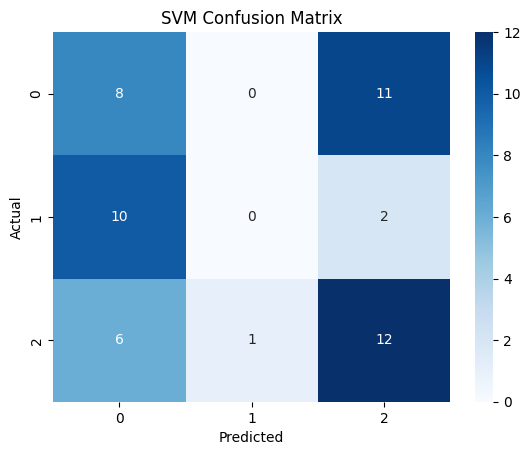

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [45]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1646 stored elements and shape (50, 3000)>

Using Naive Bayes - Algorithm

In [85]:
# Naive Bayes  - Algorithm

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)

print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes accuracy: 0.44
              precision    recall  f1-score   support

           0       0.37      0.53      0.43        19
           1       0.00      0.00      0.00        12
           2       0.52      0.63      0.57        19

    accuracy                           0.44        50
   macro avg       0.30      0.39      0.34        50
weighted avg       0.34      0.44      0.38        50

[[10  0  9]
 [10  0  2]
 [ 7  0 12]]


In [86]:
from sklearn.metrics import confusion_matrix 
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[10  0  9]
 [10  0  2]
 [ 7  0 12]]


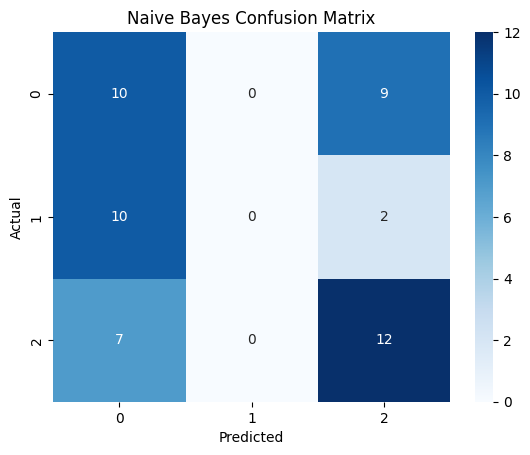

In [55]:
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2 non-null      datetime64[ns]
 1   title                 250 non-null    object        
 2   review                250 non-null    object        
 3   rating                250 non-null    int64         
 4   username              250 non-null    object        
 5   helpful_votes         250 non-null    int64         
 6   review_length         250 non-null    int64         
 7   platform              250 non-null    object        
 8   language              250 non-null    object        
 9   location              250 non-null    object        
 10  version               250 non-null    object        
 11  verified_purchase     250 non-null    object        
 12  sentiment             250 non-null    object        
 13  combined_text       

Using LSTM - (Long short term memory)

In [87]:
# LSTM - Deep Learning model
# Preprocessing
from sklearn.preprocessing import LabelEncoder
new_le = LabelEncoder()

y = new_le.fit_transform(df_new['sentiment'])

In [58]:
df_new[['sentiment', 'text_vader_sentiment']].value_counts()

sentiment  text_vader_sentiment
Negative   Positive                75
Positive   Positive                70
Neutral    Positive                42
Positive   Negative                20
Negative   Negative                17
Neutral    Negative                11
Positive   Neutral                  6
Negative   Neutral                  5
Neutral    Neutral                  4
Name: count, dtype: int64

In [59]:
pd.crosstab(df_new['sentiment'], df_new['text_vader_sentiment'])

text_vader_sentiment,Negative,Neutral,Positive
sentiment,,,
Negative,17,5,75
Neutral,11,4,42
Positive,20,6,70


In [98]:
!pip install tensorflow -q

In [116]:
pip uninstall tensorflow keras -y

Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
Found existing installation: keras 3.13.0
Uninstalling keras-3.13.0:
  Successfully uninstalled keras-3.13.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [117]:
pip install tensorflow==2.15

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tensorflow -q

In [88]:
# LSTM - Tokenization and padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token = Tokenizer(num_words=5000)
token.fit_on_texts(df_new['final_text'])


In [63]:
token.word_index

{'mr': 1,
 'piece': 2,
 'across': 3,
 'exist': 4,
 'concern': 5,
 'goal': 6,
 'produce': 7,
 'fact': 8,
 'challenge': 9,
 'beat': 10,
 'decide': 11,
 'spend': 12,
 'risk': 13,
 'red': 14,
 'live': 15,
 'interest': 16,
 'picture': 17,
 'practice': 18,
 'decision': 19,
 'list': 20,
 'personal': 21,
 'management': 22,
 'mind': 23,
 'major': 24,
 'huge': 25,
 'body': 26,
 'chance': 27,
 'everyone': 28,
 'short': 29,
 'mission': 30,
 'process': 31,
 'best': 32,
 'every': 33,
 'paper': 34,
 'recently': 35,
 'move': 36,
 'south': 37,
 'occur': 38,
 'wide': 39,
 'bed': 40,
 'time': 41,
 'behind': 42,
 'peace': 43,
 'price': 44,
 'memory': 45,
 'baby': 46,
 'wife': 47,
 'forget': 48,
 'catch': 49,
 'hear': 50,
 'color': 51,
 'population': 52,
 'require': 53,
 'wind': 54,
 'leave': 55,
 'truth': 56,
 'case': 57,
 'mention': 58,
 'within': 59,
 'scientist': 60,
 'rise': 61,
 'finish': 62,
 'front': 63,
 'hair': 64,
 'total': 65,
 'ever': 66,
 'lot': 67,
 'relationship': 68,
 'save': 69,
 'record'

In [64]:
token_words = len(token.word_index)
token_words

868

In [89]:
x_seq = token.texts_to_sequences(df_new['final_text'])
x_pad = pad_sequences(x_seq, maxlen=100)

In [90]:
# model Evaluation...
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.2, random_state=42)

LSTM model - (Long short term memory)

In [91]:
# RNN - LSTM model...
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([Embedding(input_dim=5000, output_dim=128, input_length=100),
                    LSTM(64),
                    Dropout(0.5),
                    Dense(3, activation = 'softmax')
                    ])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.build(input_shape=(None, 100))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,603 (2.63 MB)

 Trainable params: 689,603 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Add Earlystopping..
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 2, 
    restore_best_weights = True
)

output = model.fit(x_train, y_train, epochs=5, batch_size = 64, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.9550 - loss: 0.7568 - val_accuracy: 0.4000 - val_loss: 1.1155
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8750 - loss: 0.6281 - val_accuracy: 0.4000 - val_loss: 1.2493
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8500 - loss: 0.5035 - val_accuracy: 0.4400 - val_loss: 1.3409


In [97]:
output.history

{'accuracy': [0.9549999833106995, 0.875, 0.8500000238418579],
 'loss': [0.7568386793136597, 0.6280844211578369, 0.5034798979759216],
 'val_accuracy': [0.4000000059604645, 0.4000000059604645, 0.4399999976158142],
 'val_loss': [1.115492343902588, 1.2493315935134888, 1.340886116027832]}

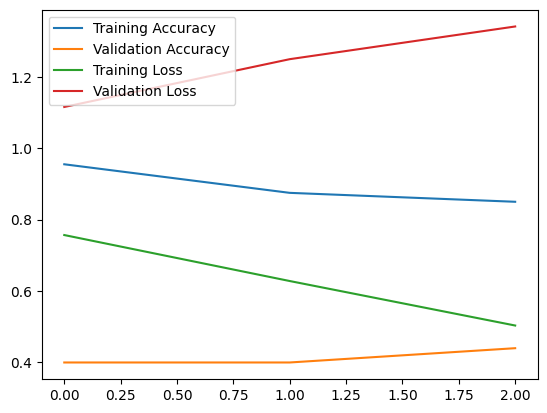

In [96]:
import matplotlib.pyplot as plt

plt.plot(output.history['accuracy'], label='Training Accuracy')
plt.plot(output.history['val_accuracy'], label='Validation Accuracy')
plt.plot(output.history['loss'], label='Training Loss')
plt.plot(output.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [98]:
y_hat = model.predict(x_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step


In [99]:
y_hat

array([[0.3669364 , 0.20815572, 0.42490798],
       [0.36529246, 0.14722766, 0.48747993],
       [0.27630275, 0.1381107 , 0.5855866 ],
       [0.41436455, 0.2747715 , 0.3108639 ],
       [0.31377518, 0.12280229, 0.56342256],
       [0.42224857, 0.22347829, 0.35427314],
       [0.3672589 , 0.2114972 , 0.4212439 ],
       [0.40658587, 0.21834551, 0.3750686 ],
       [0.3505267 , 0.19279145, 0.4566819 ],
       [0.37485388, 0.24081057, 0.38433558],
       [0.3513919 , 0.15893653, 0.4896716 ],
       [0.3293998 , 0.17371103, 0.49688917],
       [0.43838584, 0.28290614, 0.278708  ],
       [0.21644042, 0.07219587, 0.71136373],
       [0.4347577 , 0.2443318 , 0.32091057],
       [0.34827718, 0.17201301, 0.47970977],
       [0.41443825, 0.28757134, 0.29799044],
       [0.49658236, 0.2285735 , 0.27484408],
       [0.2598369 , 0.13197285, 0.60819024],
       [0.31128117, 0.22303328, 0.4656855 ],
       [0.3854258 , 0.21660067, 0.3979735 ],
       [0.449241  , 0.23796727, 0.31279176],
       [0.

In [100]:
score = model.evaluate(x_test, y_test)  

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4000 - loss: 1.1155 


In [101]:
from sklearn.metrics import confusion_matrix
cm = tf.math.confusion_matrix(y_test, tf.argmax(y_hat, axis=1))

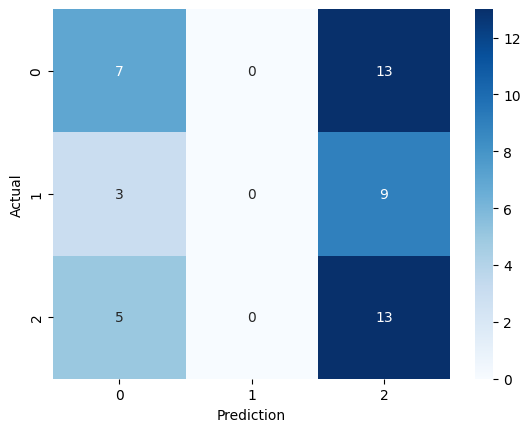

In [102]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [103]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        20
           1       0.00      0.00      0.00        12
           2       0.37      0.72      0.49        18

    accuracy                           0.40        50
   macro avg       0.28      0.36      0.30        50
weighted avg       0.32      0.40      0.34        50



In [ ]:
# Model Performance Summary

# VADER (Rule-based)        ~60%
# Logistic Regression (ML)  ~38%
# Naive Bayes (ML)          ~70%
# SVM (ML)                  ~72%
# LSTM (Deep Learning)      ~36%

In [120]:
import pickle

with open("svm_sentiment_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

In [121]:
import pickle

with open('vectorizer.pkl', 'wb') as f:    # save vectorizer
    pickle.dump(vectorizer, f)

In [125]:
print(x.shape[1])

3000


In [126]:
df_new.to_csv("cleaned_chatgpt_reviews.csv", index=False)

In [312]:
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

with open("label_map.pkl", "wb") as f:
    pickle.dump(label_map, f)